# Analysis of Categorical Variables

# Chi-Square Test of Independence

2 kategorik degisken arasındaki baglantiya chi-square ile bakarız. Cross table da bizi chi-square'ye goturur, cross-tabulara contingency table da denir. Chi-s girdi olarak cross tab kullanır.

In supervised Machine Learning, one of the primary techniques to choose best features is applying chi-square test. Remember that the correlation is used to research if there is  relationship between numerical features. The Chi-square test of independence determines whether there is a relationship between categorical variables. Here are a few examples to use chi-square test:

- We want to know if gender (male / female) is associated with smoking behavior (smoker / non-smoker). So we survey 1000 people and record their information.
- We want to know if income level (low / medium / high) is associated with types of flight classes (first / business / economy). So we survey 500 passengers and ask their income level and flight preferences.
- We want to know if ethic group (Black / White / Hispanic) is associated with coronary heart disease (yes / no). So we can use the information of 500 patients in the hospital's records. 

# Hypothesis and Formula

We form the following hypotheses when applying the chi-square independence test:

- H0: (null hypothesis): There is no association between the two categorical variables.
- H1: (alternative hypothesis): There is an association between the categorical two variables.

We compare the observed frequencies in each category to the frequencies we would expect in the categories if there would be no association. The formula behind the chi-square independence test is as follows:

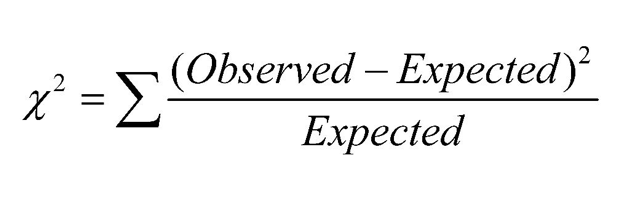

From this test statistic (χ2), we calculate a corresponding p-value. If this p value is less than the chosen significance level (generally .05), then we can reject the null hypothesis in favor of alternative hypothesis.

Since we use squares, chi-square is always > 0, positive.

* Chi-square Test using SciPy


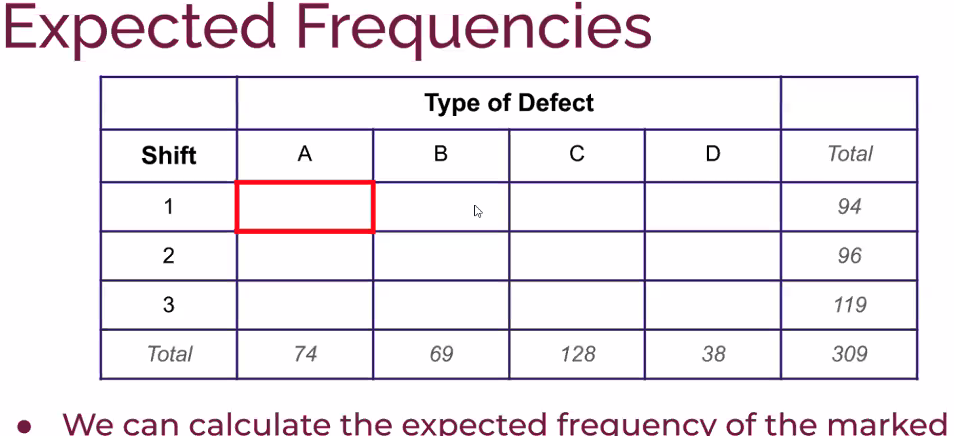

Expectedlar nasıl hesaplanır: 1-A icin 74X94 bölü 309, 1-B icin 69X94 bölü 309.... 


**Example 14.3 (Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning)**

A survey was conducted to evaluate the effectiveness of a new flu vaccine that had been administered in a small community. The vaccine was provided free of charge in a two-shot sequence over a period of 2 weeks to those wishing to avail themselves of it. Some people received the two-shot sequence, some appeared only for the first shot, and the others received neither.

A survey of 1000 local inhabitants in the following spring provided the information shown in Table 14.4. Do the data present sufficient evidence to indicate a dependence between the two classifications—vaccine category and occurrence or nonoccurrence of flu?

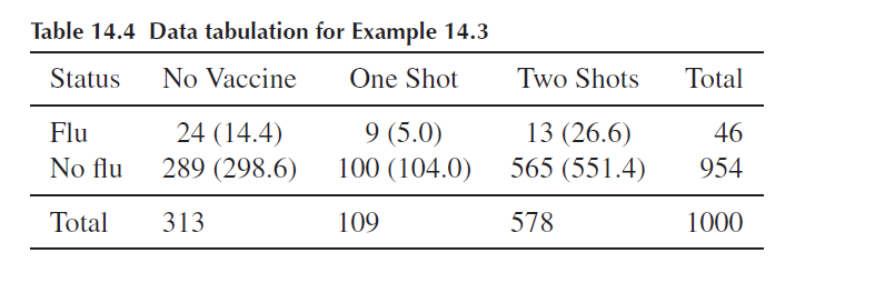

The question asks whether the data provide sufficient evidence to indicate a dependence between vaccine category and occurrence or nonoccurrence of flu. We therefore analyze the data as a contingency table.

In [41]:
from scipy.stats import chisquare


# H0: (null hypothesis): There is no association between the two categorical variables.
# H1: (alternative hypothesis): There is an association between the categorical two variables.


observed = [24, 9, 13, 289, 100, 565]
expected = [14.4, 5, 26.6, 298.6, 104, 551.4]

result = chisquare(observed, expected, ddof=2)
# ama data scienceda bundan ziyade stat, p, dof, expected = chi2_contingency(crosstab) kullanılır.

result
# Observing that χ2 falls in the rejection region, we reject the null hypothesis of 
# independence of the two classifications.

Power_divergenceResult(statistic=17.351307003271312, pvalue=0.0005983748960276381)

In [3]:
result.pvalue

0.0005983748960276381

In [4]:
alpha = 0.05
if result.pvalue<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


# Another example

In [5]:
from scipy.stats import chi2_contingency

In [6]:
table = [[15, 21, 45, 13],[26, 31, 34, 5], [33, 17, 49, 20]]

In [7]:
# Ho: The two categorical variables are independent.
# H1: The two categorical variables are dependent.

In [8]:
stat, p, dof, expected = chi2_contingency(table)
# stat chi-square oluyor. birden fazla kikare fonksiyonu var, data scienceda genelde bu kullanılır.

In [9]:
print('stat=%.3f, p=%.4f' % (stat, p))
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. The two categorical variables are dependent')
    
    
# sonuc bize bazı vardiyaların bazı hataları yaptığını ve birbilreirne bağımlı oldugunu gosteriyor.

stat=19.178, p=0.0039
We reject the null hypothesis. The two categorical variables are dependent


In [10]:
# stat ve p'yi yazdırır yukardaki fonksiyon, ama istersek expected values ve dof'u da yazdırabiliriz.
expected

array([[22.51132686, 20.99029126, 38.93851133, 11.55987055],
       [22.99029126, 21.4368932 , 39.76699029, 11.80582524],
       [28.49838188, 26.57281553, 49.29449838, 14.63430421]])

In [11]:
dof

6

In [12]:
# 2. We can get the same result with manual method
from scipy import stats
1 - stats.chi2.cdf(19.17, 6)
# cok kullanılmaz bu yontem. yukardaki kullanılır.

0.0038859579107577424

# Example -2 Titanic Dataset

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np


titanic = sns.load_dataset("titanic")
titanic.sample(7)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
158,0,3,male,NaN,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
773,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
817,0,2,male,31.0,1,1,37.0042,C,Second,man,True,NaN,Cherbourg,no,False
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
211,1,2,female,35.0,0,0,21.0000,S,Second,woman,False,NaN,Southampton,yes,True
430,1,1,male,28.0,0,0,26.5500,S,First,man,True,C,Southampton,yes,True
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False


In [15]:
titanic.shape

(891, 15)

In [16]:
# How many null values are there in columns?

titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
titanic=titanic.drop(["deck", "age"], axis=1)

In [18]:
titanic=titanic.dropna()

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   sibsp        889 non-null    int64   
 4   parch        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   adult_male   889 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        889 non-null    object  
 12  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(5)
memory usage: 79.1+ KB


In [20]:
titanic2=titanic.sample(200, random_state=42)

In [21]:
# Does gender affects survival ?

In [22]:
# We can see both male and female survivors by using a crosstab
crosstab = pd.crosstab(titanic2.survived, titanic2.sex)
crosstab

sex,female,male
survived,,
0,24,101
1,56,19


In [23]:
# Ho: The two categorical variables (gender and survived) are independent.
# H1: The two categorical variables are dependent.

In [24]:
from scipy import stats
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=57.800, p=0.0000


In [25]:
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. Gender and survived variables are dependent')

We reject the null hypothesis. Gender and survived variables are dependent


# Example-3 Titanic Dataset

In [26]:
# Does class affect survival? In other words Class and survived variables are dependent or not?

In [27]:
crosstab = pd.crosstab(titanic2["survived"], titanic2["class"])
crosstab

class,First,Second,Third
survived,,,
0,16,27,82
1,32,18,25


In [28]:
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=26.664, p=0.0000


In [29]:
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. Class and survived variables are dependent')

We reject the null hypothesis. Class and survived variables are dependent


In [30]:
crosstab = pd.crosstab(titanic2["embarked"], titanic2["class"])
crosstab

class,First,Second,Third
embarked,,,
C,21,2,15
Q,1,2,12
S,26,41,80


In [31]:
# crosstabı yuzdeli gormek icin:
#crosstab = pd.crosstab(titanic2["embarked"], titanic2["class"], normalize="columns")
#crosstab

In [32]:
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=30.661, p=0.0000


In [33]:
mpg = sns.load_dataset("mpg")
mpg.sample(7)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
365,20.2,6,200.0,88.0,3060,17.1,81,usa,ford granada gl
267,27.5,4,134.0,95.0,2560,14.2,78,japan,toyota corona
385,38.0,4,91.0,67.0,1995,16.2,82,japan,datsun 310 gx
224,15.0,8,302.0,130.0,4295,14.9,77,usa,mercury cougar brougham
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3
235,26.0,4,97.0,75.0,2265,18.2,77,japan,toyota corolla liftback
287,16.5,8,351.0,138.0,3955,13.2,79,usa,mercury grand marquis


In [34]:
crosstab = pd.crosstab(mpg["origin"], mpg["cylinders"])
crosstab

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


In [35]:
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=180.102, p=0.0000


In [36]:
# Another example

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [37]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [38]:
crosstab = pd.crosstab(penguins["species"], penguins["sex"])
crosstab

sex,Female,Male
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,61


In [39]:
stat, p, dof, expected = stats.chi2_contingency(crosstab)
print('stat=%.3f, p=%.4f' % (stat, p))

stat=0.049, p=0.9760


In [40]:
if p > 0.05:
	print('Fail to reject Ho')
else:
	print('We reject the null hypothesis. Sex and island variables are dependent')
    
# cinsiyet ile species arası dogal olarak iliski yok.. bunu ispatlamis olduk.

Fail to reject Ho
